# <center><b>Analysis on Facebook data<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
  - **5.1** [**Missing value**](#Section51)
  - **5.2** [**Outliers**](#Section53)
  - **5.3** [**Duplicate rows**](#Section52)
  - **5.4** [**Incorrect data**](#Section54)
 

**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Facebook is one of most famous and commonly used as social network platform.

- Facebook is not the only place to connect with different people but a big marketing arena.

- It is the most influencing platform in current time starting from an advertisement of **product** to **political views**.

<center><img width=50% src="https://cdn.vox-cdn.com/thumbor/5P4LKaHsYnRaoO7eYEESB92hUQE=/0x0:2040x1360/1820x1213/filters:focal(883x755:1209x1081):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/68812002/jbareham_180405_1777_facebook_0003.0.jpg"></center>

- **Cambridge Analytica** is one of famous example which use the Facebook platform to influence the election of the worlds most powerful country.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Advertise right product to right category of people.
- Customer segmentation of all type of users in facebook.
- Increase number of users.
- Increase activity time in facebook. 
- As Data Science role I have been hired to analyze facebook activity of users.
- I will present an initial investigation on this data to check for various patterns and trends of users.
- This would be a **leading step** to help the user and company to provide right help to users.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q datascience 
!pip install -q pandas-profiling

In [ ]:
!pip install -q --upgrade pandas-profiling

In [ ]:
!pip install --upgrade pandas

<a name = Section33></a>
### **3.2 Importing Libraries**

In [258]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                                # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import re

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the Facebook user their age, date of birth, gender, and face book activity like likes on various platforms.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 99003 | 15 | 11.4 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Userid | Unique id of captured user register in Facebook |
|2| Age | Age of user when data was captured  |
|3| Gender |	Gender of a user |
|4| Tenure |	The time they are active on Facebook |
|5| Friend Count |	Friends count a user have on Facebook |
|6| Friendship Initiated |	How many friend request is sent by the user |
|7| Facebook Activity |	Activity count like **likes, likes received, like** and **like received in mobile and web** |
|8| Date of birth |	The date of birth of registered uses, date, month and year is already segregated.|

<a name = Section42></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [259]:
df_facebook = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
df_facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.00,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.00,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.00,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.00,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.00,0,0,0,0,0,0,0,0


**Observations:**

- We can see there are total 99003 records and 15 features.

- Except for genders, and userid all are continuous variables.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Missing Value**

- For **quick analysis** will use pandas methods to find out missing values.

In [5]:
df_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

**Observations:**

- We have 175 records as missing value for **gender** out of 99003 records.
- I will remove row of gender having value as **NaN.**
- We also have only 2 missing records value of tenure will remove that too. It won't have any impact in out analysis

<a name = Section53></a>
### **5.2 Outliers**

- For **quick analysis** will use pandas methods to find out outliers.

In [4]:
df_facebook.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.00,99003.00,99003.00,99003.00,99003.00,99001.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00
mean,1597045.21,37.28,14.53,1975.72,6.28,537.89,196.35,107.45,156.08,142.69,106.12,84.12,49.96,58.57
std,344059.18,22.59,9.02,22.59,3.53,457.65,387.30,188.79,572.28,1387.92,445.25,839.89,285.56,601.42
min,1000008.00,13.00,1.00,1900.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1298805.50,20.00,7.00,1963.00,3.00,226.00,31.00,17.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,1596148.00,28.00,14.00,1985.00,6.00,412.00,82.00,46.00,11.00,8.00,4.00,4.00,0.00,2.00
75%,1895744.00,50.00,22.00,1993.00,9.00,675.00,206.00,117.00,81.00,59.00,46.00,33.00,7.00,20.00
max,2193542.00,113.00,31.00,2000.00,12.00,3139.00,4923.00,4144.00,25111.00,261197.00,25111.00,138561.00,14865.00,129953.00


**Observations:**

- There are outliers in age and dob_year, but there is posibbility person with age above 100.
- I will keep outliers for my analysis on facebook data.

<a name = Section52></a>
### **5.3 Duplicate rows**

- For **quick analysis** will use pandas methods to find out duplicates values.

In [25]:
df_facebook[df_facebook.duplicated()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received


**Observations:**

- There are no duplicates value

<a name = Section54></a>
### **5.4 Incorrect data**

- For **quick analysis** will use pandas methods to find out incorrect data for other thatn **male, female and others**.

In [27]:
df_facebook['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

**Observations:**

- Data only have male and female as categorial variable, so we are good to go for data cleaning

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

In [260]:
...
#Removing missing value first in order to correct value which have postfix to value.
...
# Dropping rows containing missing values
df_facebook.dropna(inplace=True)

<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

In [345]:
df_facebook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 98826 non-null  int64   
 1   age                    98826 non-null  int64   
 2   dob_day                98826 non-null  int64   
 3   dob_year               98826 non-null  int64   
 4   dob_month              98826 non-null  int64   
 5   gender                 98826 non-null  object  
 6   tenure                 98826 non-null  float64 
 7   friend_count           98826 non-null  int64   
 8   friendships_initiated  98826 non-null  int64   
 9   likes                  98826 non-null  int64   
 10  likes_received         98826 non-null  int64   
 11  mobile_likes           98826 non-null  int64   
 12  mobile_likes_received  98826 non-null  int64   
 13  www_likes              98826 non-null  int64   
 14  www_likes_received     98826 non-null 

**Observations:**

- By seeing information we are good to go ahead with EDA

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

**<h3>Question:** Facebook is popular in which age group.</h3>

In [285]:
b = [10,20, 30, 40, 50, 60, 120]
bins = pd.cut(df_facebook['age'], b).value_counts()

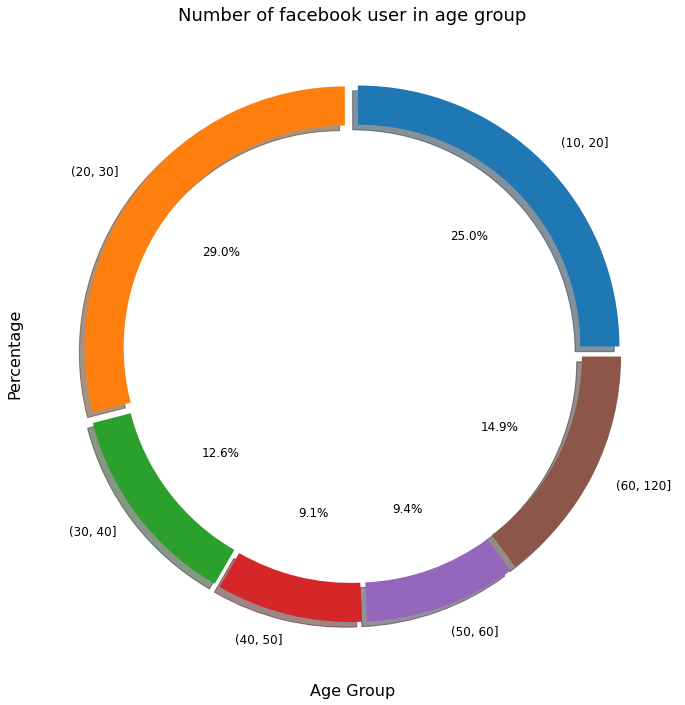

In [384]:
bins.sort_index().plot(kind='pie',
                        autopct='%3.1f%%',
                        wedgeprops=dict(width=0.15), 
                        explode=np.ones(6)/30,
                        figsize=(12, 12),
                       shadow = True,
                        fontsize=12, 
                        startangle=0)
plt.xticks(fontSize = 14)
plt.xlabel('Age Group', fontSize = 16)
plt.ylabel('Percentage', fontSize = 16)
plt.title('Number of facebook user in age group', fontSize = 18)
plt.show()

**Observations**:

- **54%** of users in Facebook are in the age range of **10** to **30**.

- **31%** of users in Facebook are in the age range of **30** to **60**.

- Rest of the users are above **60+**.

**<h3>Question:** Who are more active in Facebook, male or female.</h3>

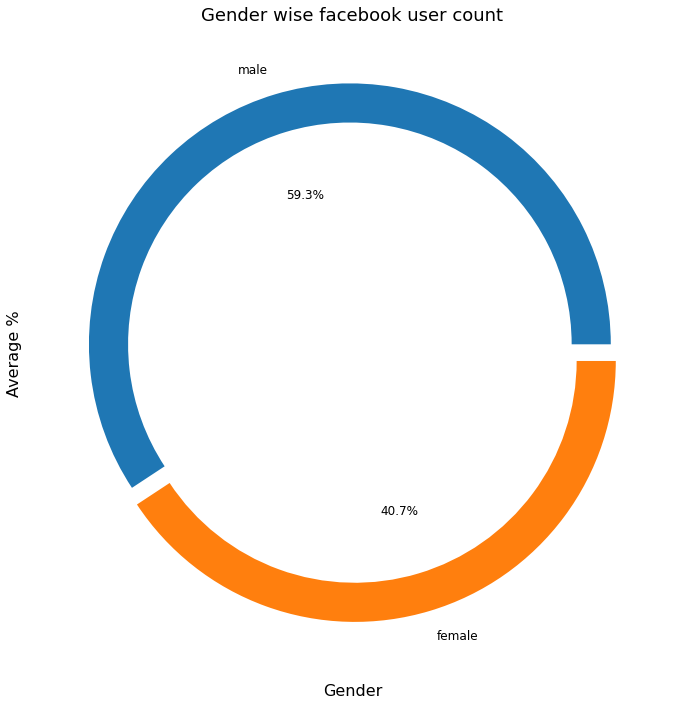

In [368]:
df_facebook['gender'].value_counts().plot(kind='pie',
                        autopct='%3.1f%%',
                        wedgeprops=dict(width=0.15), 
                        explode=np.ones(2)/30,
                        figsize=(12, 12),
                        fontsize=12, 
                        startangle=0)
plt.xticks(fontSize = 14)
plt.xlabel('Gender', fontSize = 16)
plt.ylabel('Average %', fontSize = 16)
plt.title('Gender wise facebook user count', fontSize = 18)
plt.show()

**Observations**:

- Around **60%** of users are **Male** on Facebook.

**<h3>Question:** Which platform is more convinient and popular among users.</h3>

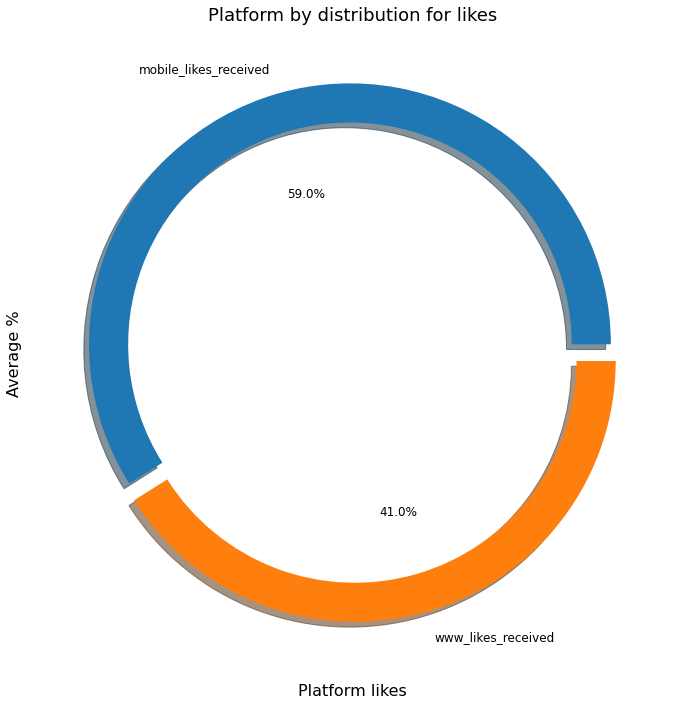

In [365]:
df_facebook[['mobile_likes_received','www_likes_received']].sum().plot(kind='pie',
                        autopct='%3.1f%%',
                        wedgeprops=dict(width=0.15), 
                        explode=np.ones(2)/30,
                        figsize=(12, 12),
                        shadow=True,
                        fontsize=12, 
                        startangle=0)
plt.xticks(fontSize = 14)
plt.xlabel('Platform likes', fontSize = 16)
plt.ylabel('Average %', fontSize = 16)
plt.title('Platform by distribution for likes', fontSize = 18)
plt.show()

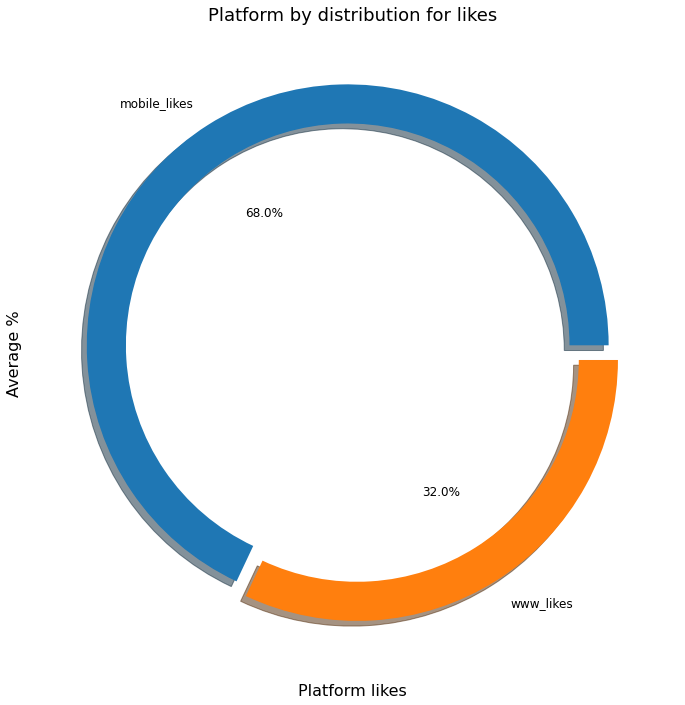

In [369]:
df_facebook[['mobile_likes','www_likes']].sum().plot(kind='pie',
                        autopct='%3.1f%%',
                        wedgeprops=dict(width=0.15), 
                        explode=np.ones(2)/30,
                        figsize=(12, 12),
                        shadow=True,
                        fontsize=12, 
                        startangle=0)
plt.xticks(fontSize = 14)
plt.xlabel('Platform likes', fontSize = 16)
plt.ylabel('Average %', fontSize = 16)
plt.title('Platform by distribution for likes', fontSize = 18)
plt.show()

**Observations**:

- Seeing pattern mobiles are more convenient amond users.

**<h3>Question:** How many users are new and old in facebook?</h3>

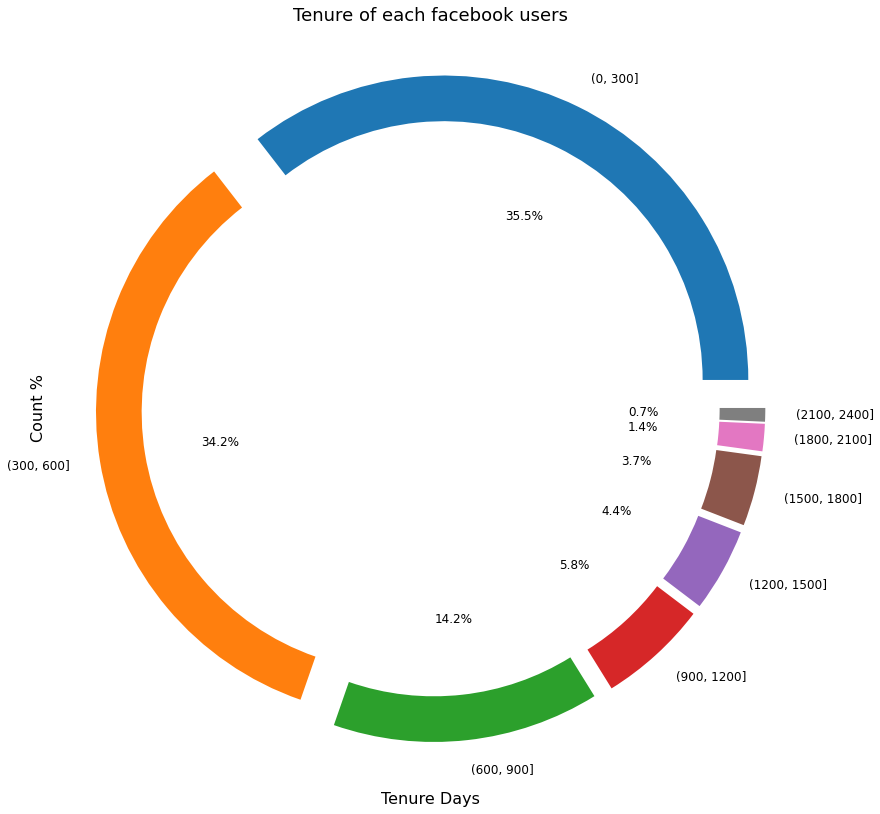

In [416]:
t = np.arange(0, 2401, 300)
t_bin = pd.cut(df_facebook['tenure'], t).value_counts()
#fig = plt.figure(figsize=(20, 12))



t_bin.sort_index().plot(kind='pie',
                        autopct='%3.1f%%',
                        wedgeprops=dict(width=0.15), 
                        explode=np.ones(8)/10,
                        figsize=(14, 14),
                        fontsize=12, 
                        startangle=0)
#plt.xticks(np.arange(len(t_bin.index)), t_bin.index, fontSize = 14, rotation = 90)

plt.xlabel('Tenure Days', fontSize = 16)
plt.ylabel('Count %', fontSize = 16)
plt.title('Tenure of each facebook users', fontSize = 18)
plt.show()

**Observations**:

- Approx 70% users have tenure in range of 600 days.

- Trend show people will join more in recent times.

**<h3>Question:** Which range of people have more number of friends?</h3>

In [288]:
df_facebook['age_group']= pd.cut(df_facebook['age'], b)

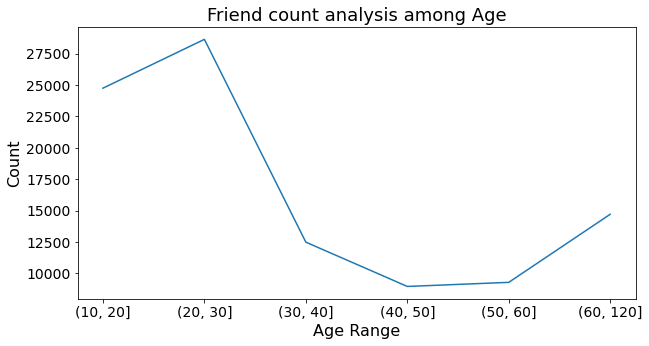

In [172]:
fig = plt.figure(figsize=(10, 5))
df_facebook.groupby(by='age_group')['friend_count'].count().plot.line()
plt.xticks(fontSize = 14)
plt.yticks(fontSize = 14)
plt.xlabel('Age Range', fontSize = 16)
plt.ylabel('Count', fontSize = 16)
plt.title('Friend count analysis among Age', fontSize = 18)
plt.show()

**Observations**:

- Clearly, we can see the age range of 20 to 30 has more friend count.

- There is a sudden decline in friend count after that.

**<h3>Question:** Gender distribution in age range?</h3>

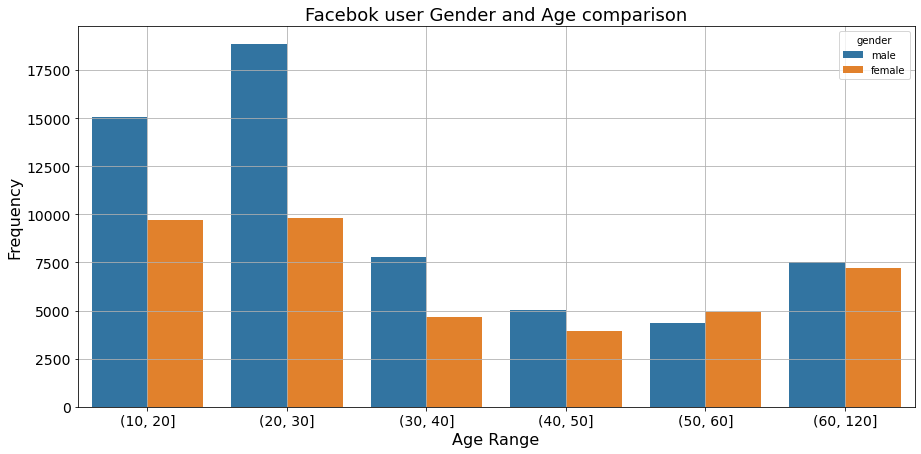

In [164]:
fig = plt.figure(figsize=(15, 7))

# Plot countplot of age concerning treatment
sns.countplot(x='age_group', hue='gender', data=df_facebook)

# Add some cosmetics
plt.title(label='Facebok user Gender and Age comparison', size=18)
plt.xlabel(xlabel='Age Range', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations**:

- Younger **males** have Facebook accounts than **females**.

- Difference is gradually **decreasing** in the mid-age range.

- **Females** are a little more interested than in facebook in the later 50s and 60s

**<h3>Question:** Gender distribution in for facebbok users?</h3>

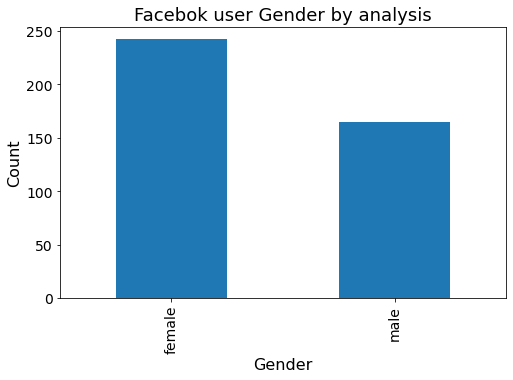

In [370]:
fig = plt.figure(figsize=(8, 5))
df_facebook.groupby('gender')['friend_count'].mean().plot.bar()
plt.title(label='Facebok user Gender by analysis', size=18)
plt.xlabel(xlabel='Gender', size=16)
plt.ylabel(ylabel='Count', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

**Observations**:

- **Females** have more friend counts than men.

**<h3>Question:** Who initiate more friends request than they have friend counts?</h3>

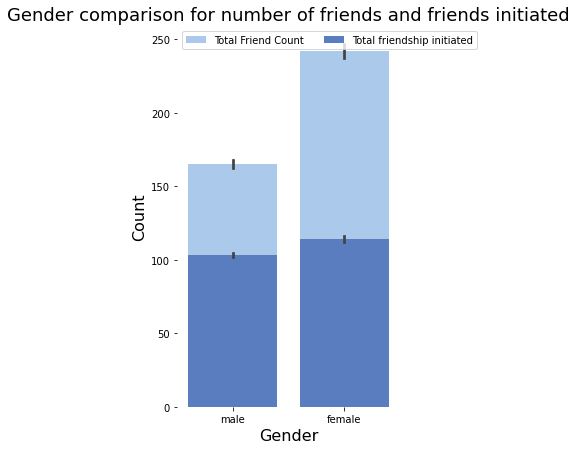

In [199]:
f, ax = plt.subplots(figsize=(4, 7))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x="gender", y="friend_count", data=df_facebook,
            label="Total Friend Count", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
p = sns.barplot(x="gender", y="friendships_initiated", data=df_facebook,
            label="Total friendship initiated", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)

p.set_xlabel("Gender", fontsize = 16)
p.set_ylabel("Count", fontsize = 16)
p.set_title("Gender comparison for number of friends and friends initiated", fontsize = 18)

sns.despine(left=True, bottom=True)

# Display the plot
plt.show()

**Observations**:

- Percentage of friend requests initiated by **Males** than **female**.

- Comparatively **females** have more friends vs she initiates friend requests.

**<h3>Question:** Which platforms are commonly used in various age ranges?</h3>

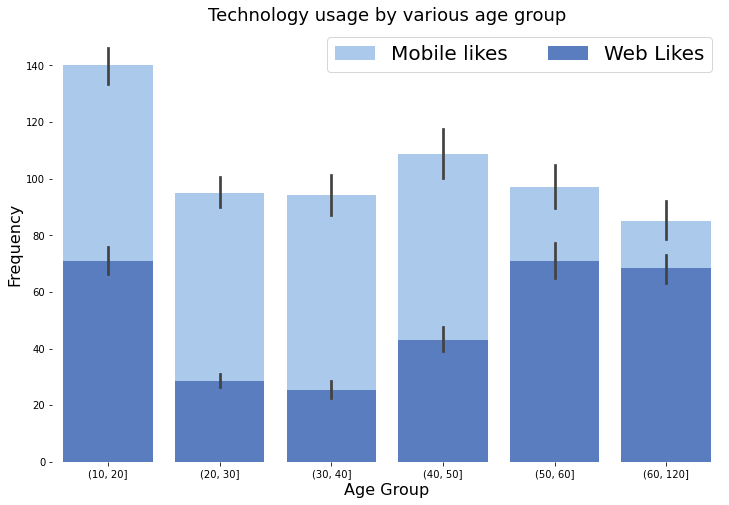

In [307]:
f, ax = plt.subplots(figsize=(12, 8))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x="age_group", y="mobile_likes", data=df_facebook,
            label="Mobile likes", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
p = sns.barplot(x="age_group", y="www_likes", data=df_facebook,
            label="Web Likes", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True,prop={'size': 20})

p.set_xlabel("Age Group", fontsize = 16)
p.set_ylabel("Frequency", fontsize = 16)
p.set_title("Technology usage by various age group", fontsize = 18)

sns.despine(left=True, bottom=True)

# Display the plot
plt.show()

**Observations**:

- Mobiles are more common in the age range from 20 to 50.

- Old people have almost the same likeness for both mobile and web.

**<h3>Question:** Who is more active on Facebook among various aspects of Facebook activities?</h3>

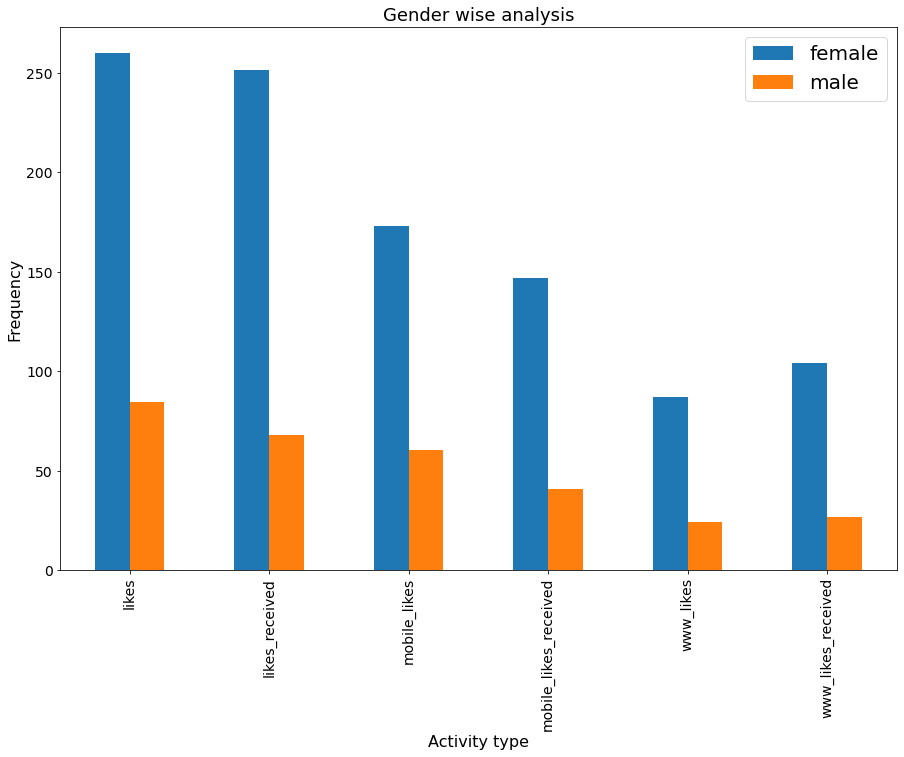

In [305]:
coloums = ['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']
new_ds = df_facebook.groupby(by='gender')[coloums].mean()
new_ds.transpose().plot.bar(figsize=(15,10))
plt.title(label='Gender wise analysis', size=18)
plt.xlabel(xlabel='Activity type', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size': 20})
plt.show()

**Observations**:

- **Females** are more **generous** in liking people activities.

- **Females** are **receiving likes** too from a different group of people.

- Irrespective of platform **females** are **more active** on Facebook.

**<h3>Question:** Age-wise distribution on different Facebook activities and platform likeness?</h3>

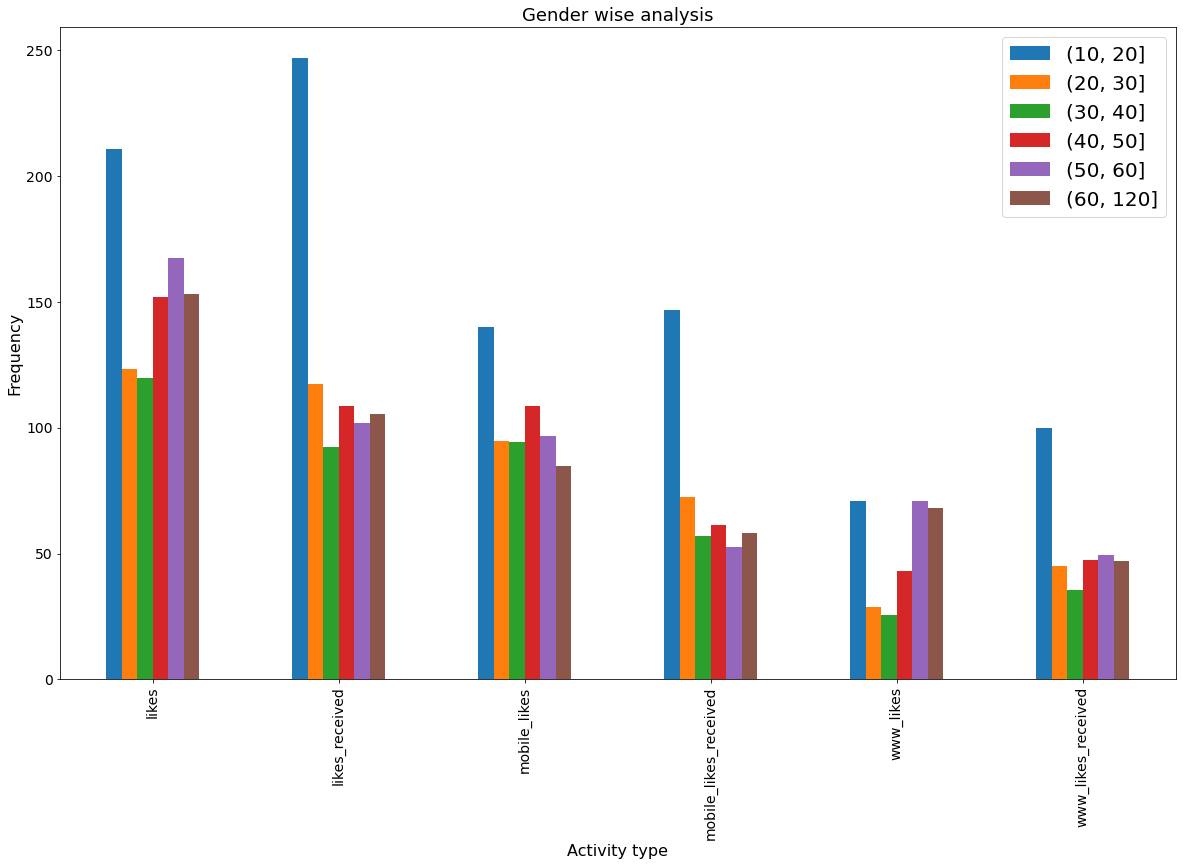

In [310]:
coloums = ['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']
new_ds_age = df_facebook.groupby(by='age_group')[coloums].mean()
new_ds_age.transpose().plot.bar(figsize=(20,12))
plt.title(label='Gender wise analysis', size=18)
plt.xlabel(xlabel='Activity type', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size': 20})
plt.show()

**Observations**:

- Accept the age range of 10 to 20, all age ranges are active on Facebook.

- Age range from 40+ are more generous in liking people activity than mids 20s and 30s.

- Mobile users are almost similar for all age ranges except people of below 20s.

- Usage of the web is very common in old age.

**<h3>Question:** Gender comparison among a range of age for initiating friends requests?</h3>

In [417]:
df_gender_age=  df_facebook.groupby(by=['gender','age_group'])['friendships_initiated'].mean()

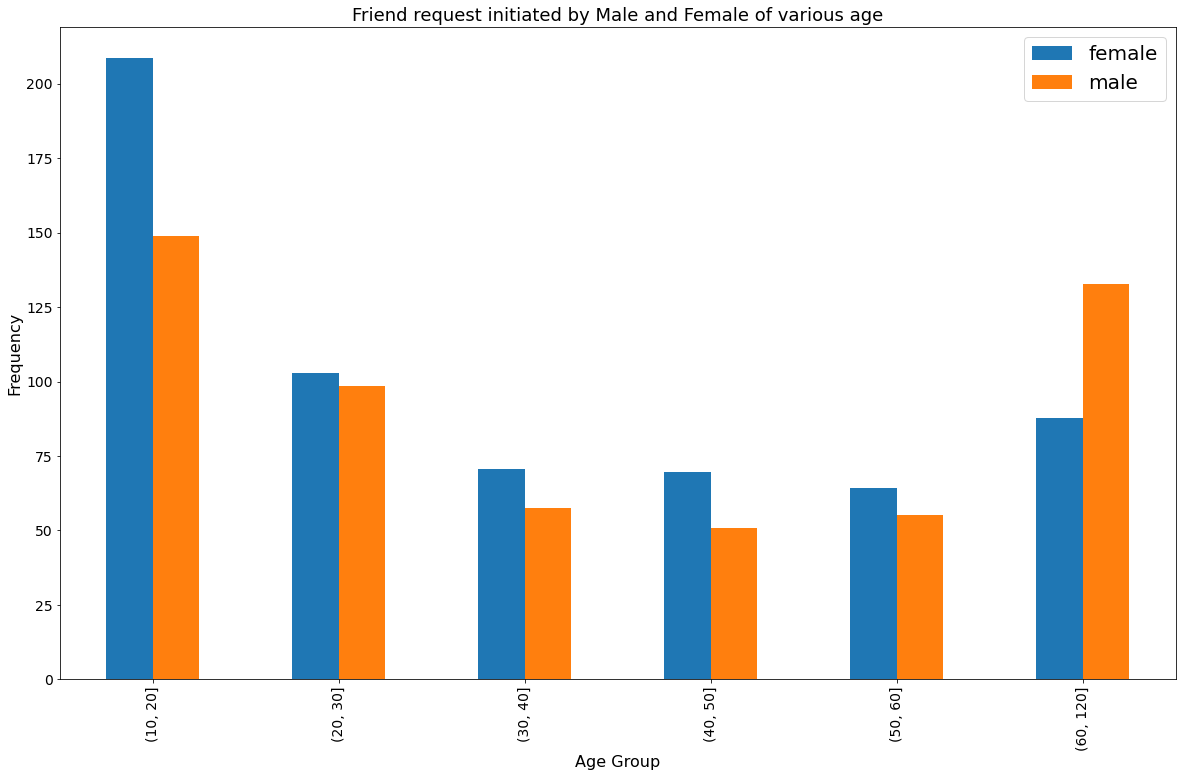

In [333]:
df_gender_age.unstack().transpose().plot.bar(figsize=(20,12))
plt.title(label='Friend request initiated by Male and Female of various age', size=18)
plt.xlabel(xlabel='Age Group', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size': 20})
plt.show()

**Observations**:

- In general friend requests initiated by males are more.

- Difference is not much in among old range of people and earlies the 20s and 30s 

- Females of age more than 60+ are more active in sending friends requests.

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Male are more active users at a young age.

- Mid and old age are getting active on Facebook day by day.

- Mobile platforms are very convenient and easy to use anywhere.

- Females are more generous in admiring people and getting admiration.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Better content and advertisement for mid and old age people to increase more activities and number of users on Facebook.

- We need to increase more safety and programs for females as they are more active on Facebook.

- Filter the content and campaign for old age so that they can actively participate on Facebook.    

- Increasing the user interface of mobile and making it more user friendly as it is a more convenient platform to use.

- More features to attract and increase activities on Facebook.